In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
train_data = pd.read_csv("../Data/train.csv")
test_data = pd.read_csv("../Data/test.csv")

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Survived    0    1
Sex               
female     81  233
male      468  109


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


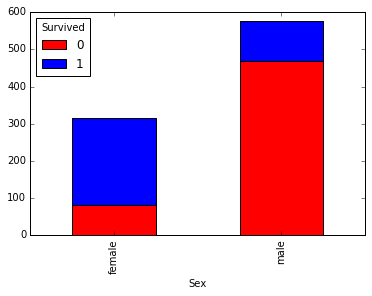

In [56]:
survived_by_sex = pd.crosstab(train_data.Sex, train_data.Survived, margins=False)
print(survived_by_sex)
survived_by_sex.plot(kind = "bar", stacked = True, color = ["red", "blue"])
survived_by_sex.apply(lambda r: r/r.sum(), axis=1)

# TODO why [boolean array] return rows
# survived_by_sex[1]

Survived              0         1
Sex    Pclass                    
female 1       0.031915  0.968085
       2       0.078947  0.921053
       3       0.500000  0.500000
male   1       0.631148  0.368852
       2       0.842593  0.157407
       3       0.864553  0.135447

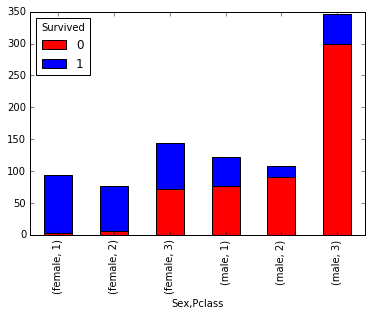

In [88]:
survived_by_sex_and_Pclass = pd.crosstab([train_data.Sex, train_data.Pclass], train_data.Survived, margins=False)
survived_by_sex_and_Pclass.plot(kind="bar", stacked = True, color = ["red", "blue"])
survived_by_sex_and_Pclass.apply(lambda x: x / x.sum(), axis=1)

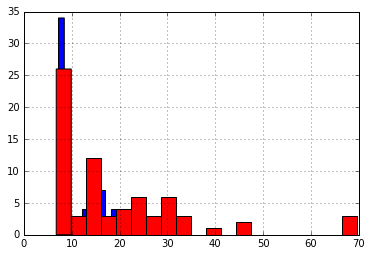

In [89]:
# train_data.boxplot(column="Fare", by="Sex")
# ax1 = plt.subplot(3,1,1)
# ax1.set_title = "Class 1"
# train_data.loc[(train_data.Pclass == 1) & train_data.Survived == 1]["Fare"].hist(bins = 20, color = "red", ax = ax1)
# plt.subplot(3,1,2)
# train_data.loc[train_data.Pclass == 2]["Fare"].hist(bins = 20)
# plt.subplot(3,1,3)
train_data.loc[(train_data.Sex == "female") & (train_data.Pclass == 3) & (train_data.Survived == 1)]["Fare"].hist(bins = 20, color = "blue")
train_data.loc[(train_data.Sex == "female") & (train_data.Pclass == 3) & (train_data.Survived == 0)]["Fare"].hist(bins = 20, color = "red")

In [87]:
train_data[(train_data.Sex == "female") & (train_data.Pclass == 3) & (train_data.Fare > 20)]["Survived"].value_counts()

0    28
1     9
Name: Survived, dtype: int64

In [92]:
bins = [0, 10,20,30, 1000]
group_names = [1, 2, 3, 4]
train_data["Fare_class"] = pd.cut(train_data['Fare'], bins, labels=group_names)

sex_Pclass_Fareclass = pd.crosstab([train_data.Sex,train_data.Pclass,train_data.Fare_class], train_data.Survived)
sex_Pclass_Fareclass.apply(lambda x: x/x.sum(), axis=1)

Survived                         0         1
Sex    Pclass Fare_class                    
female 1      1                NaN       NaN
              2                NaN       NaN
              3           0.142857  0.857143
              4           0.022989  0.977011
       2      1                NaN       NaN
              2           0.085714  0.914286
              3           0.096774  0.903226
              4           0.000000  1.000000
       3      1           0.406250  0.593750
              2           0.418605  0.581395
              3           0.666667  0.333333
              4           0.875000  0.125000
male   1      1           1.000000  0.000000
              2                NaN       NaN
              3           0.558824  0.441176
              4           0.634146  0.365854
       2      1                NaN       NaN
              2           0.841270  0.158730
              3           0.840000  0.160000
              4           0.785714  0.214286
       3      1           0.890625  0.109375
              2           0.763158  0.236842
              3           0.875000  0.125000
              4           0.760000  0.240000

In [110]:
# Hypothesis One: Woman and Children under age 12 Survived, not man
train_data[(train_data.Age < 10)]["Survived"].value_counts()

1    38
0    24
Name: Survived, dtype: int64

In [115]:
test_data[(test_data.Age < 2)]["Sex"].value_counts()

female    5
male      3
Name: Sex, dtype: int64

In [101]:
def write_to_csv(results_df, filename):
    headers = ["PassengerId", "Survived"]
    results_df[headers].to_csv(filename, header=headers, index = False)

In [116]:
test_data["Survived"] = (test_data.Sex == "female").apply(lambda x : 1 if x else 0)
print(test_data["Survived"].value_counts())
test_data.loc[(test_data.Sex == "female") & (test_data.Pclass == 3) & (test_data.Fare > 20), "Survived"] = 0
print(test_data["Survived"].value_counts())

write_to_csv(test_data, "women_except_class3.csv")

# Assume children younger than 6 survive harm the results, so this assumption failed
test_data.loc[test_data.Age < 6, "Survived"] = 1
print(test_data["Survived"].value_counts())

write_to_csv(test_data, "women_except_class3_and_children.csv")

0    266
1    152
Name: Survived, dtype: int64
0    277
1    141
Name: Survived, dtype: int64
0    270
1    148
Name: Survived, dtype: int64


In [138]:
# Data munging
# 1. filling missing value: age
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)
test_data["Age"].fillna(train_data["Age"].mean(), inplace = True)

test_data["Fare"].fillna(test_data["Fare"].mean(), inplace = True)

train_data["Gender"] = train_data["Sex"].map({"male": 0, "female": 1})
test_data["Gender"] = test_data["Sex"].map({"male": 0, "female": 1})

# train_data["Fare"] = train_data["Fare"]/train_data["Fare"].max().astype(np.float64)
# test_data["Fare"] = test_data["Fare"]/test_data["Fare"].max().astype(np.float64)

# train_data["Age"] = train_data["Age"]/train_data["Age"].max().astype(np.float64)
# test_data["Age"] = test_data["Age"]/test_data["Age"].max().astype(np.float64)

# print(test_data["Age"])
import numpy as np
from sklearn.feature_extraction import DictVectorizer as DV

def one_hot_encoder(df, columns):
    cat_dict = df[columns].T.to_dict().values()
    vectorizer = DV( sparse = False )
    vector_df = pd.DataFrame(vectorizer.fit_transform( cat_dict ), columns= vectorizer.get_feature_names())
    vector_df.index = df.index
    
    return df.join(vector_df)

append_train_df= one_hot_encoder(train_data, ["Sex"])
append_test_df = one_hot_encoder(test_data, ["Sex"])


append_train_df["Age"] = append_train_df["Age"]/append_train_df["Age"].max().astype(np.float64)
append_train_df["Sex"] = append_train_df["Sex"].apply(lambda x: 1 if x == "male" else 0)

In [148]:
from sklearn.metrics import accuracy_score
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
import pydot
from sklearn.externals.six import StringIO

training_labels = train_data["Survived"].apply(lambda x :1 if x else 0)

# baseline for training data
baseline_labels = (train_data.Sex == "female").apply(lambda x : 1 if x else 0)
baseline_score = accuracy_score(training_labels, baseline_labels)
print(baseline_score)

training_column = ["Gender", "Pclass", "Fare", "Age"]
# training_column = ["Sex", "Age"]
# clf = tree.DecisionTreeClassifier()
# clf = svm.SVC(C= 1)
clf = RandomForestClassifier(n_estimators = 100)
clf = clf.fit(train_data[training_column], training_labels)
print(clf)


predict_labels = clf.predict(train_data[training_column])

train_score = accuracy_score(training_labels, predict_labels)
print(train_score)



predict_labels = clf.predict(test_data[training_column])
append_test_df["Survived"] = pd.Series(predict_labels)
write_to_csv(append_test_df, "sex_fare_pclass_rf.csv")

# dot_data = StringIO() 
# tree.export_graphviz(clf, out_file=dot_data,
#                     feature_names=training_column,
#                     class_names = ["not_survived", "survived"])
# graph = pydot.graph_from_dot_data(dot_data.getvalue(), )
# graph.write_png("dtree2.png")

0.786756453423
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.979797979798
